# An Analysis for London Residence Selection and Crime Control 2008-2016

# Background


London, the capital and largest city of England and the United Kingdom, exerts a considerable impact on various sectors, including arts, commerce, education, entertainment, fashion, finance, healthcare, media, professional services, research and development, tourism, and transportation. It is the most-visited city based on international arrivals and has the busiest city airport system by passenger traffic.



# Problem


Given London's significance on the global stage, ensuring the security of the city is paramount. Certain parts of London have higher crime rates, which poses a concern for people migrating from different parts of the world for work and business. These individuals are often very conscious about selecting a safe area for residence. Additionally, local police can benefit from this analysis by focusing their efforts on controlling crime in areas that are major centers for criminal activities.



# Solution


This project aims to identify the safest borough in London based on total crimes recorded between 2008 and 2016. It will explore the neighborhoods within that borough to determine the 10 most common venues in each neighborhood and finally cluster these neighborhoods using k-means clustering.

This report is targeted at individuals looking to relocate to London. Safety is a top concern when moving to a new place, as it directly impacts the quality of life. By analyzing crime statistics from 2008 to 2016, this project provides valuable insights to help people make informed decisions about where to live.

In [1]:
import pandas as pd # library for data analysis
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# SCRAPING BOROUGH DATA FROM WIKEPEDIA

In [2]:
# get the response in the form of html

wikiurl="https://en.wikipedia.org/wiki/List_of_London_boroughs"

table_class="wikitable sortable jquery-tablesorter"

response=requests.get(wikiurl)

# print(response.status_code) Indicating the response was successful

In [3]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')

london_borough_table=soup.find('table',{'class':"wikitable sortable"})

In [4]:
# Extracting the table as a list
df=pd.read_html(str(london_borough_table))

# convert the list to dataframe
df=pd.DataFrame(df[0])


In [5]:
df.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2019 est),Co-ordinates,Nr. in map
0,Barking and Dagenham[note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,212906,".mw-parser-output .geo-default,.mw-parser-outp...",25
1,Barnet,NaN,NaN,Barnet London Borough Council,Labour,"Barnet House, 2 Bristol Avenue, Colindale",33.49,395896,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,248287,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,329771,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,332336,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [6]:
# CLEANING SCRAPED DATA

# Removing irrelevant columns such as Inner, Status, Local Authority, Headquarters 
df.drop(columns= ["Inner", "Status", "Local authority","Headquarters", "Nr. in map"], inplace = True)


# Renaming columns
df.rename(columns={"Political control":"Political_control","Area (sq mi)": "Area","Population (2019 est)":"Population", 
                  "Co-ordinates": "Coordinates"}, inplace = True)

## Exporting into csv

In [7]:
df.to_csv('london_borough_table.csv', index=False)


In [8]:
# MAKING CHANGES TO CSV TO COUPLE OF ROWS IN BOROUGH NAMES TO KEEP IT UNIFORM

In [9]:
# IMPORTING THE BOROUGH CSV

df_borough = pd.read_csv("london_borough_table.csv")

In [10]:
df_borough


,Borough,Political_control,Area,Population,Coordinates
0,Barking and Dagenham[note 1],Labour,13.93,212906,".mw-parser-output .geo-default,.mw-parser-outp..."
1,Barnet,Labour,33.49,395896,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W
2,Bexley,Conservative,23.38,248287,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E
3,Brent,Labour,16.70,329771,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W
4,Bromley,Conservative,57.97,332336,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E
5,Camden,Labour,8.40,270029,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W
6,Croydon,No overall control,33.41,386710,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W
7,Ealing,Labour,21.44,341806,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W
8,Enfield,Labour,31.74,333794,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W
9,Greenwich[note 2],Labour,18.28,287942,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E


# IMPORTING LONDON CRIME DATA

In [11]:
df = pd.read_csv('london_crime_by_lsoa.csv')

In [12]:
# renaming value column

df.rename(columns = {"value":"num_of_crimes"}, inplace = True)

In [13]:
df.head()

,lsoa_code,borough,major_category,minor_category,num_of_crimes,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


# EXPLORATORY DATA ANALYSIS

# UNIVARIATE ANALYSIS

## MAJOR CRIME CATEGORY COUNT

/var/folders/8h/67zlqswd6nsfxgp6gvbcx7gc0000gn/T/ipykernel_7604/2365604365.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=crime_category, x='major_category', y='num_of_crimes', palette="deep")


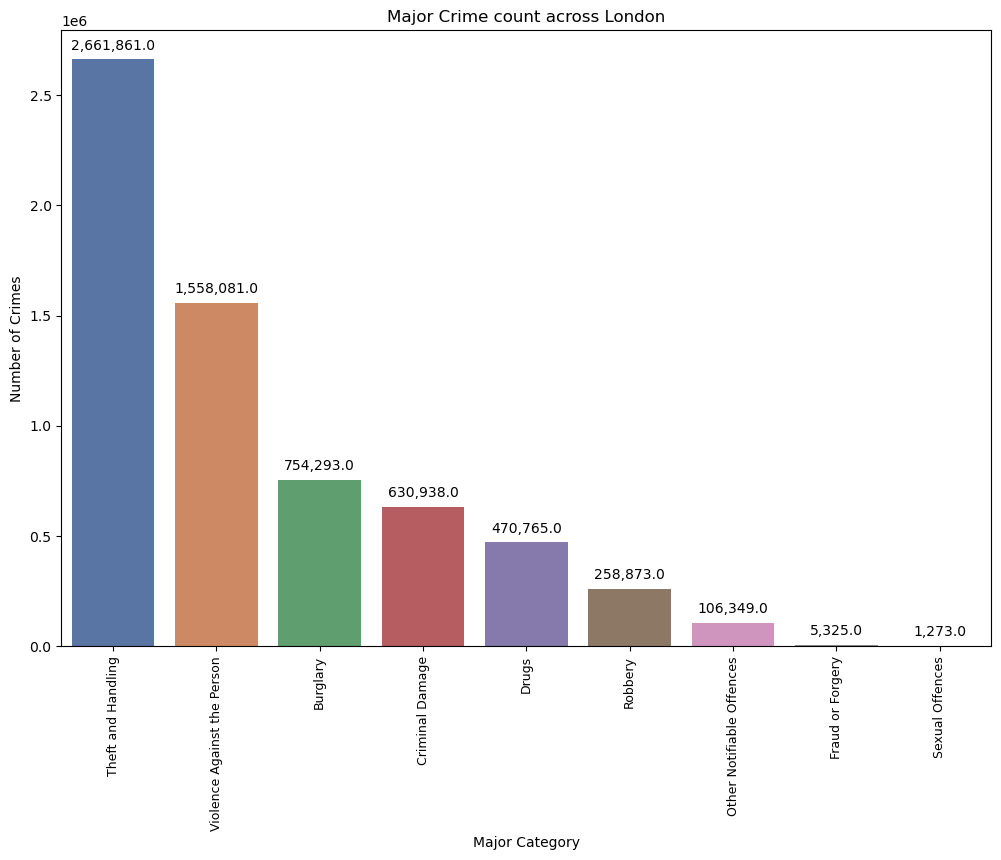

In [14]:
# Grouping and counting
crime_category = df.groupby("major_category")['num_of_crimes'].sum().sort_values(ascending=False)

# Reset index to convert Series to DataFrame
crime_category = crime_category.reset_index()

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=crime_category, x='major_category', y='num_of_crimes', palette="deep")

# Annotate each bar with its height
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,}',  # Format the number with commas
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',  # Adjusted to 'bottom' for better positioning
                xytext=(0, 5),  # Offset the text slightly above the bar
                textcoords='offset points')

# Customize the plot
plt.title("Major Crime count across London")
plt.xlabel("Major Category")
plt.xticks(rotation=90, size=9)
plt.ylabel("Number of Crimes")
plt.show()

### INSIGHTS

- Theft and handling tops the major crime
- Violence against person comes second followed by Burglary, Criminal damage and drugs

## MINOR CRIME CATEGORY COUNT

/var/folders/8h/67zlqswd6nsfxgp6gvbcx7gc0000gn/T/ipykernel_7604/1627480252.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=crime_category, x='minor_category', y='num_of_crimes', palette="deep")


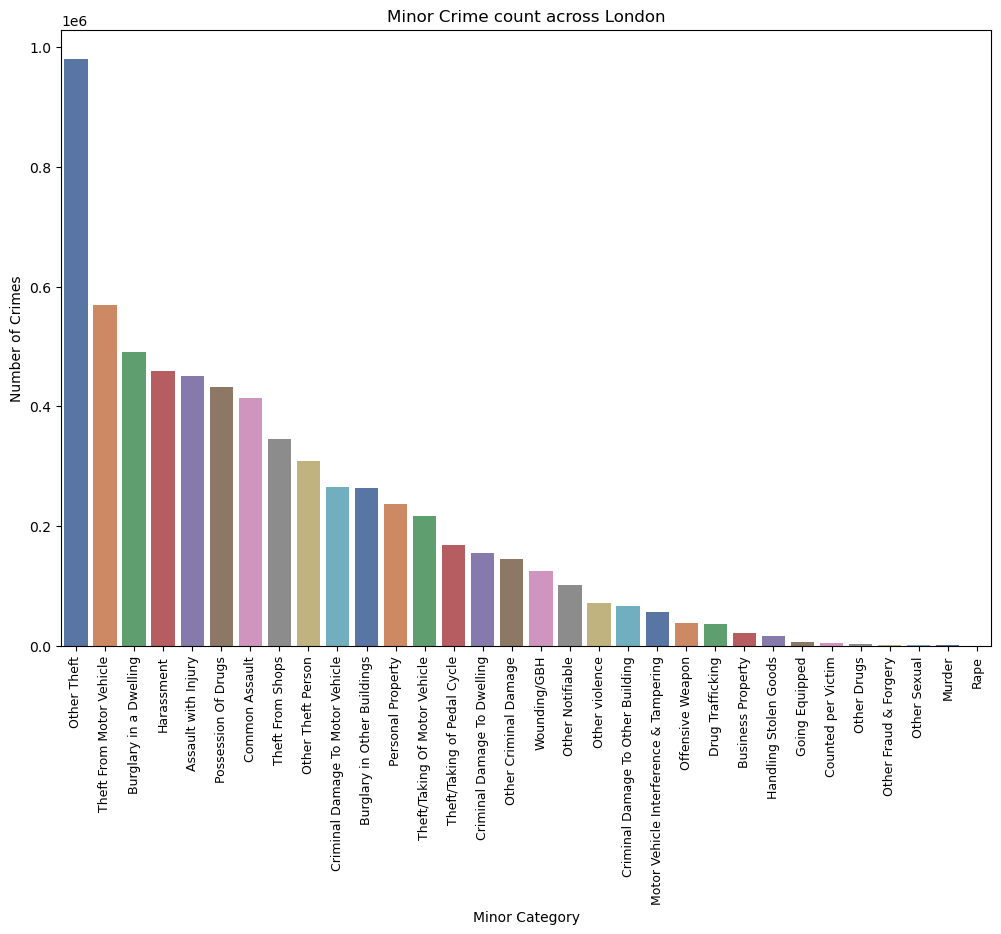

In [15]:
# Grouping and counting
crime_category = df.groupby("minor_category")['num_of_crimes'].sum().sort_values(ascending=False)

# Reset index to convert Series to DataFrame
crime_category = crime_category.reset_index()

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=crime_category, x='minor_category', y='num_of_crimes', palette="deep")


# Customize the plot
plt.title("Minor Crime count across London")
plt.xlabel("Minor Category")
plt.xticks(rotation=90, size=9)
plt.ylabel("Number of Crimes")
plt.show()

### INSIGHTS

- Uncategorised theft takes the top place followed by Theft from Motor Vehicle, Burglary in residential property, 
followed by Hrrasment and assault with injury

In [16]:
df

,lsoa_code,borough,major_category,minor_category,num_of_crimes,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


# MULTIVARIATE ANALYSIS

In [17]:
london_crime = df.groupby(['borough','major_category'])['major_category'].count().unstack()

In [18]:
london_crime

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
borough,,,,,,,,,
Barking and Dagenham,23760.0,46764.0,26244.0,7236.0,17496.0,22248.0,2808.0,91260.0,73224.0
Barnet,45576.0,89748.0,47412.0,8316.0,31320.0,39528.0,3672.0,171180.0,136080.0
Bexley,31536.0,61884.0,33264.0,4752.0,20088.0,25920.0,1944.0,113076.0,93204.0
Brent,37368.0,73440.0,46980.0,9288.0,28728.0,34128.0,3564.0,141156.0,115992.0
Bromley,42552.0,84456.0,42336.0,8532.0,28296.0,34668.0,2592.0,156492.0,123984.0
Camden,28728.0,57348.0,34020.0,7668.0,23220.0,26784.0,2592.0,111240.0,86832.0
City of London,540.0,1188.0,756.0,NaN,432.0,540.0,NaN,3564.0,2700.0
Croydon,47520.0,94176.0,51948.0,9396.0,30564.0,43740.0,5076.0,176256.0,143424.0
Ealing,42336.0,84024.0,50220.0,8532.0,31536.0,37908.0,3996.0,160812.0,130032.0


In [19]:
# Creating a new total column and resetting index 

london_crime['total']=london_crime.sum(axis=1)
london_crime.reset_index(inplace = True)

In [20]:
london_crime.rename(columns = {'borough': "Borough"}, inplace = True)


In [21]:
# MERGING DATA SET

london_crime_final = pd.merge(london_crime, df_borough, on = "Borough" )
london_crime_final.head()

,Borough,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person,total,Political_control,Area,Population,Coordinates
0,Barnet,45576.0,89748.0,47412.0,8316.0,31320.0,39528.0,3672.0,171180.0,136080.0,572832.0,Labour,33.49,395896,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W
1,Bexley,31536.0,61884.0,33264.0,4752.0,20088.0,25920.0,1944.0,113076.0,93204.0,385668.0,Conservative,23.38,248287,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E
2,Brent,37368.0,73440.0,46980.0,9288.0,28728.0,34128.0,3564.0,141156.0,115992.0,490644.0,Labour,16.70,329771,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W
3,Bromley,42552.0,84456.0,42336.0,8532.0,28296.0,34668.0,2592.0,156492.0,123984.0,523908.0,Conservative,57.97,332336,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E
4,Camden,28728.0,57348.0,34020.0,7668.0,23220.0,26784.0,2592.0,111240.0,86832.0,378432.0,Labour,8.40,270029,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W


In [22]:
df3 = london_crime_final.copy()

In [23]:
# FEATURE ENGINEERING FOR ANALYSIS

# CRIME RATE CALCULATIONS
df3['crime_rate'] = (df3['total'] / df3['Population']) * 1000

# Yearly change in crime rate
df3['yearly_change_in_crime_rate'] = df3.groupby('Borough')['crime_rate'].diff()

# Moving average of crime rate (3-year window)
df3['Moving Average Crime Rate'] = df3.groupby('Borough')['crime_rate'].transform(lambda x: x.rolling(window=3).mean())

In [24]:
df3['Population Density'] = df3['Population'] / df3['Area']

crime_types = ['Burglary', 'Criminal Damage', 'Drugs', 'Fraud or Forgery',
               'Other Notifiable Offences', 'Robbery', 'Sexual Offences',
               'Theft and Handling', 'Violence Against the Person']

for crime in crime_types:
    df[f'{crime} Proportion'] = df3[crime] / df3['total']

In [25]:
# DESCRIPTIVE STATISTICS

df3.describe()

,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person,total,Area,Population,crime_rate,yearly_change_in_crime_rate,Moving Average Crime Rate,Population Density
count,29.000000,29.00000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,0.0,0.0,29.000000
mean,33182.068966,65790.62069,37356.827586,7530.206897,24627.724138,29815.448276,3396.413793,125887.034483,100685.793103,428272.137931,19.580000,285044.965517,1510.816811,NaN,NaN,20027.711236
std,6632.846630,13044.48754,7961.415049,2414.245481,4676.045696,6726.782098,998.462444,24910.124727,20611.047789,86066.681474,12.834544,59520.532855,110.514303,NaN,NaN,11010.302350
min,21168.000000,42120.00000,22140.000000,2808.000000,14580.000000,15660.000000,1836.000000,77328.000000,60912.000000,259524.000000,4.680000,156129.000000,1269.081895,NaN,NaN,5732.896326
25%,28728.000000,57348.00000,32616.000000,5508.000000,21060.000000,25920.000000,2592.000000,107892.000000,86832.000000,366660.000000,11.140000,251160.000000,1458.174814,NaN,NaN,11821.319797
50%,31536.000000,62424.00000,36504.000000,8316.000000,23760.000000,29484.000000,3564.000000,120420.000000,96876.000000,413856.000000,14.990000,281120.000000,1512.498597,NaN,NaN,15942.444030
75%,37368.000000,73440.00000,43740.000000,9288.000000,28620.000000,34884.000000,3996.000000,141156.000000,115992.000000,490644.000000,22.170000,329677.000000,1556.980683,NaN,NaN,28620.287253
max,47520.000000,94176.00000,51948.000000,11772.000000,31752.000000,43740.000000,5724.000000,176256.000000,143424.000000,602100.000000,57.970000,395896.000000,1900.889649,NaN,NaN,42561.598952


In [26]:
# DATA SUMMARY

datadict = pd.DataFrame(df3.dtypes)
# identify missing values of the 11 columns,add the stats to the datadict
datadict['MissingVal'] = df3.isnull().sum()

# Identify number of unique values, For object nunique will the number of levels
# Add the stats the data dict
datadict['NUnique']=df3.nunique()

# Count of values
datadict['Count']=df3.count()

#Identify number of duplicates
datadict["Duplicates"] = df3.duplicated()

datadict = datadict.rename(columns={0:'DataType'})
datadict


,DataType,MissingVal,NUnique,Count,Duplicates
Borough,object,0,29,29,NaN
Burglary,float64,0,26,29,NaN
Criminal Damage,float64,0,28,29,NaN
Drugs,float64,0,28,29,NaN
Fraud or Forgery,float64,0,25,29,NaN
Other Notifiable Offences,float64,0,26,29,NaN
Robbery,float64,0,28,29,NaN
Sexual Offences,float64,0,16,29,NaN
Theft and Handling,float64,0,28,29,NaN
Violence Against the Person,float64,0,29,29,NaN


# INSIGHTS

* There are generally no null values except yearly chage and moving average as these are changes over year. 
* There are no duplicates in the dataset as well

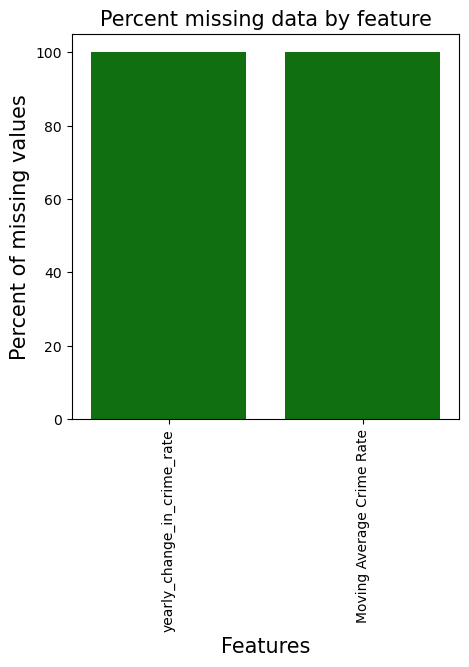

In [27]:
# PLOTTING PERCENT OF NULL VALUES

# Calculate percentage of missing values
nan_count = (df3.isna().sum() / df3.shape[0]) * 100
nan_count = nan_count[nan_count > 0].sort_values(ascending=False)

# Plotting
plt.figure(figsize=(5, 5))
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=nan_count.index, y=nan_count.values, color = "green")
plt.show()

# 5 boroughs with the MOST number of crimes

In [28]:


top_5 = df3.groupby('Borough')['total'].sum().sort_values(ascending = False).head()

top_5 = pd.DataFrame(top_5)
top_5.reset_index(inplace = True)
top_5

,Borough,total
0,Croydon,602100.0
1,Barnet,572832.0
2,Ealing,549396.0
3,Bromley,523908.0
4,Lambeth,519048.0


/var/folders/8h/67zlqswd6nsfxgp6gvbcx7gc0000gn/T/ipykernel_7604/289578120.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Borough", y="total", data=top_5, palette='viridis')


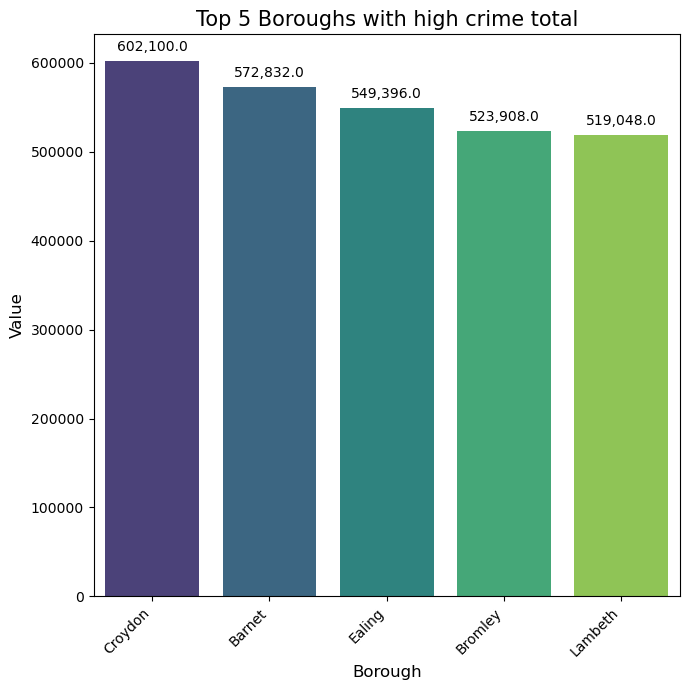

In [29]:
# Create the bar plot
plt.figure(figsize=(7,7))
ax = sns.barplot(x="Borough", y="total", data=top_5, palette='viridis')
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Top 5 Boroughs with high crime total', fontsize=15)
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its height
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,}',  # Format the number with commas
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',  # Adjusted to 'bottom' for better positioning
                xytext=(0, 5),  # Offset the text slightly above the bar
                textcoords='offset points')

plt.tight_layout()
plt.show()


# INSIGHTS

# 1. Croydon, Bromley, Lambeth, Ealing and Barnet are the Top 5 borough with highest total of crimes

# 5 Boroughs with least number of crimes

In [30]:
last_5 = df3.groupby('Borough')['total'].sum().sort_values(ascending = False).tail()

last_5 = pd.DataFrame(last_5)
last_5.reset_index(inplace = True)
last_5

,Borough,total
0,Merton,339876.0
1,Sutton,322488.0
2,Richmond upon Thames,304128.0
3,Kensington and Chelsea,296784.0
4,Kingston upon Thames,259524.0


/var/folders/8h/67zlqswd6nsfxgp6gvbcx7gc0000gn/T/ipykernel_7604/1354626324.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Borough", y="total", data=last_5, palette='viridis')


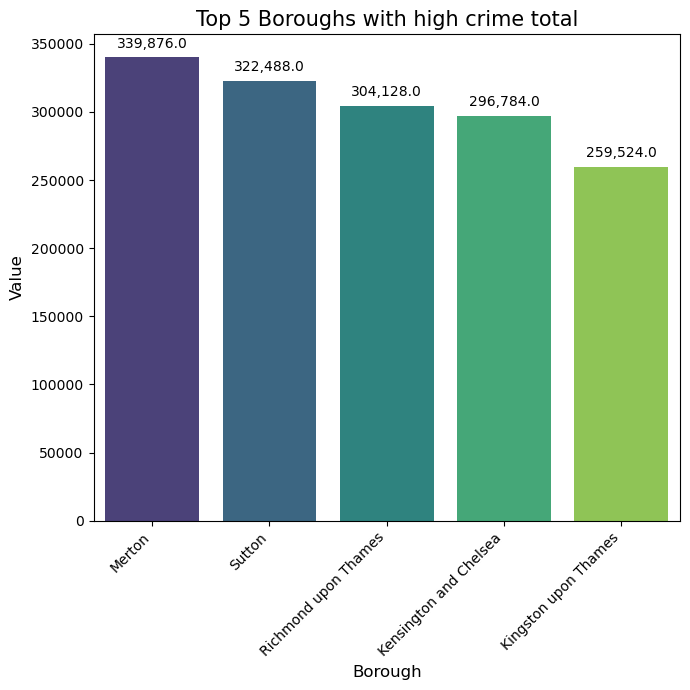

In [31]:
# Create the bar plot
plt.figure(figsize=(7,7))
ax = sns.barplot(x="Borough", y="total", data=last_5, palette='viridis')
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Top 5 Boroughs with high crime total', fontsize=15)
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its height
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,}',  # Format the number with commas
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',  # Adjusted to 'bottom' for better positioning
                xytext=(0, 5),  # Offset the text slightly above the bar
                textcoords='offset points')

plt.tight_layout()
plt.show()


# INSIGHTS

# 1. Merton, Sutton, Kingston upon thames, Kensington and Chelsea, Richmond upon thames are the boroughs with least 
# number of crimes

* Absolute total crimes may not be the right indicator of crime as every borough's population is different
* Crime rate shoud be compared to get the right indication of crimes

# 5 BOROUGHS WITH TOP 5 CRIME RATES

In [32]:
top_5_cr = df3.groupby('Borough')['crime_rate'].sum().sort_values(ascending = False).head()

top_5_cr = pd.DataFrame(top_5_cr)
top_5_cr.reset_index(inplace = True)
top_5_cr

,Borough,crime_rate
0,Kensington and Chelsea,1900.889649
1,Merton,1645.506129
2,Ealing,1607.332815
3,Lambeth,1592.005742
4,Lewisham,1586.230799


/var/folders/8h/67zlqswd6nsfxgp6gvbcx7gc0000gn/T/ipykernel_7604/3894492486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Borough", y="crime_rate", data=top_5_cr, palette='viridis')


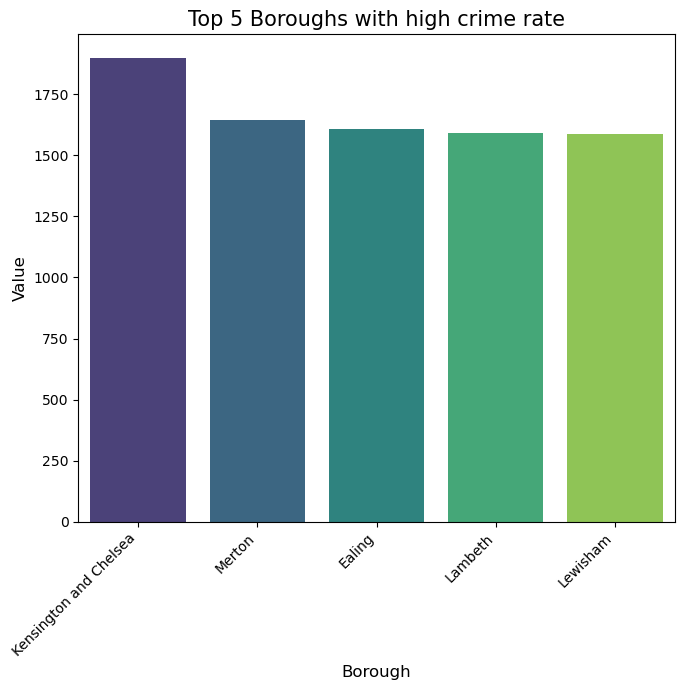

In [33]:
# Create the bar plot
plt.figure(figsize=(7,7))
ax = sns.barplot(x="Borough", y="crime_rate", data=top_5_cr, palette='viridis')
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Top 5 Boroughs with high crime rate', fontsize=15)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


# INSIGHTS

* Interestingly two boroughs which had the least absolute total crimes are the top 2

# 5 Boroughs with least crime rates

In [34]:
last_5_cr = df3.groupby('Borough')['crime_rate'].sum().sort_values(ascending = False).tail()

last_5_cr = pd.DataFrame(last_5_cr)
last_5_cr.reset_index(inplace = True)
last_5_cr

,Borough,crime_rate
0,Hillingdon,1442.252420
1,Westminster,1403.123409
2,Camden,1401.449474
3,Newham,1334.960666
4,Tower Hamlets,1269.081895


/var/folders/8h/67zlqswd6nsfxgp6gvbcx7gc0000gn/T/ipykernel_7604/1327620801.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Borough", y="crime_rate", data=last_5_cr, palette='viridis')


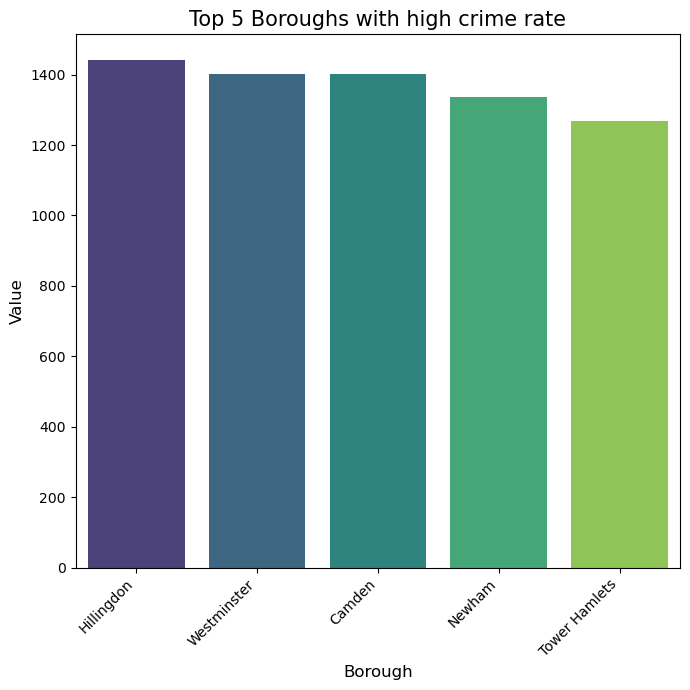

In [35]:
# Create the bar plot
plt.figure(figsize=(7,7))
ax = sns.barplot(x="Borough", y="crime_rate", data=last_5_cr, palette='viridis')
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Top 5 Boroughs with high crime rate', fontsize=15)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


# CRIME DISTRIBUTION FOR KENSIGTON

In [36]:
kensington_chelsea_crime = london_crime[london_crime["Borough"]=="Kensington and Chelsea"]
kensington_chelsea_crime.drop(columns=["total"], axis = 1, inplace = True)

/var/folders/8h/67zlqswd6nsfxgp6gvbcx7gc0000gn/T/ipykernel_7604/3437978510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kensington_chelsea_crime.drop(columns=["total"], axis = 1, inplace = True)


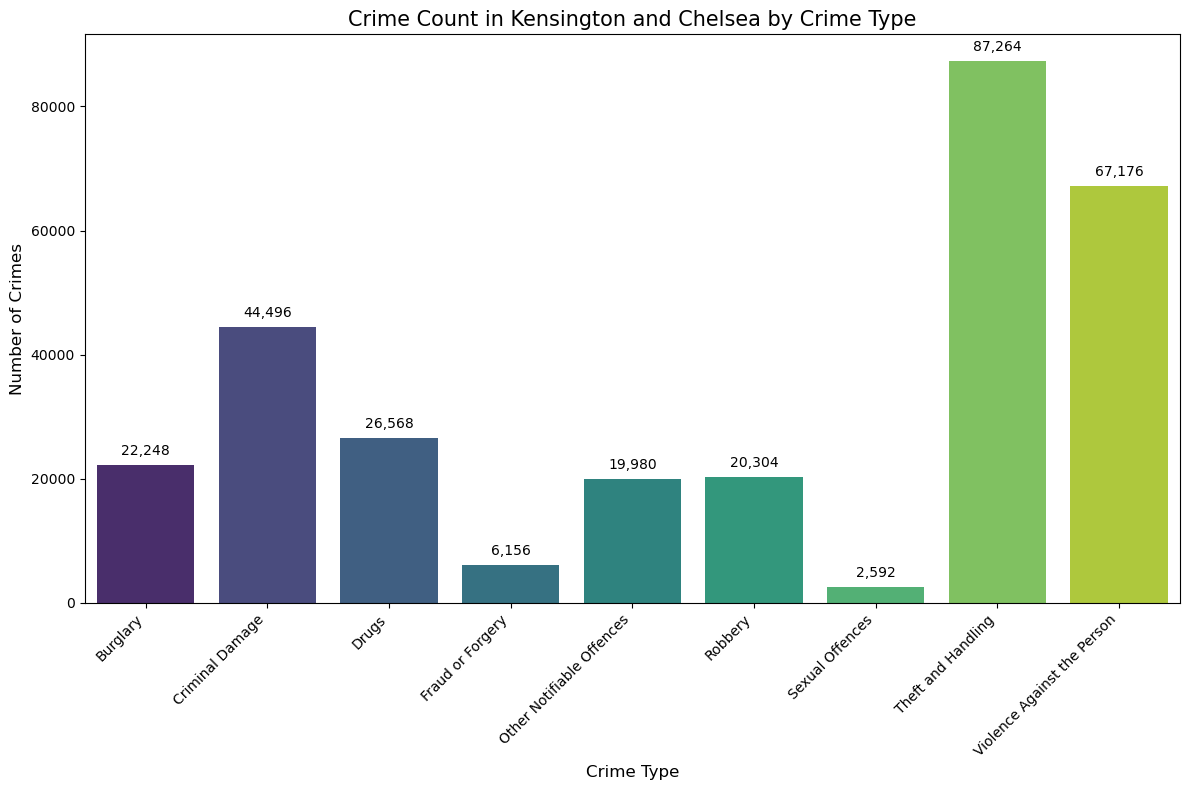

In [37]:
plt.figure(figsize=(12, 8))
ax = sns.barplot( data=kensington_chelsea_crime, palette='viridis')
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.title('Crime Count in Kensington and Chelsea by Crime Type', fontsize=15)
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its height
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}',  # Format the number with commas and no decimal points
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',  # Adjusted to 'bottom' for better positioning
                xytext=(0, 5),  # Offset the text slightly above the bar
                textcoords='offset points')

plt.tight_layout()
plt.show()


/var/folders/8h/67zlqswd6nsfxgp6gvbcx7gc0000gn/T/ipykernel_7604/834364180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hillingdon_crime.drop(columns=["total"], axis = 1, inplace = True)


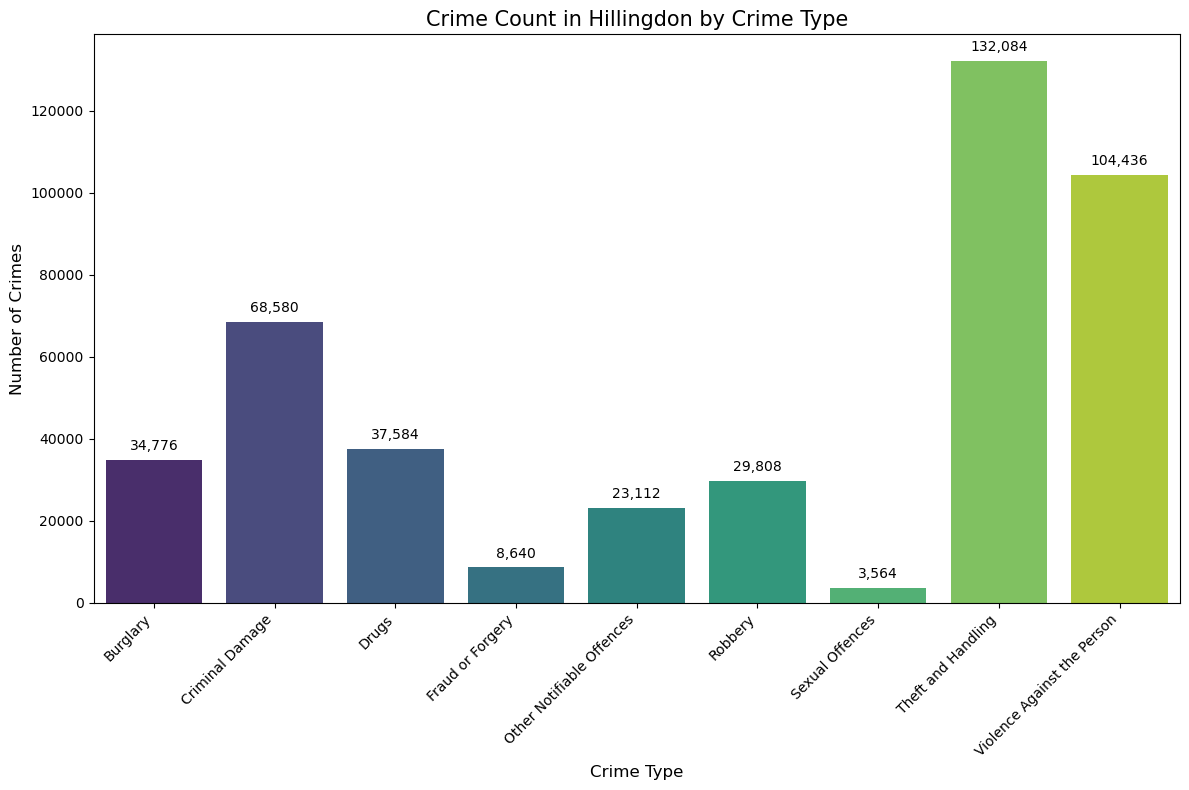

In [38]:
hillingdon_crime = london_crime[london_crime["Borough"]=="Hillingdon"]
hillingdon_crime.drop(columns=["total"], axis = 1, inplace = True)


plt.figure(figsize=(12, 8))
ax = sns.barplot( data=hillingdon_crime, palette='viridis')
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.title('Crime Count in Hillingdon by Crime Type', fontsize=15)
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its height
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}',  # Format the number with commas and no decimal points
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',  # Adjusted to 'bottom' for better positioning
                xytext=(0, 5),  # Offset the text slightly above the bar
                textcoords='offset points')

plt.tight_layout()
plt.show()

# TOTAL NUMBER OF CRIMES BY YEAR

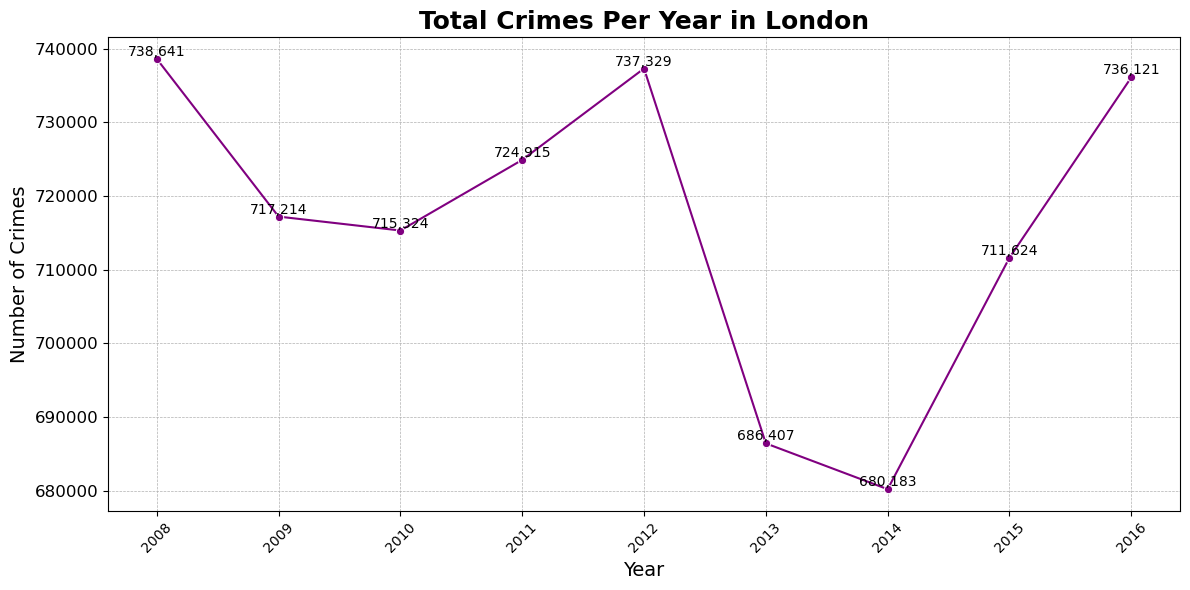

In [39]:
# Group by year and sum the number of crimes
crime_by_year = df.groupby("year")['num_of_crimes'].sum()

# Create a line plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=crime_by_year.index, y=crime_by_year.values, marker='o', linestyle='-', color='purple')

# Customize the plot
plt.title('Total Crimes Per Year in London', fontsize=18, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.xticks(crime_by_year.index, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Annotate each point with its value
for x, y in zip(crime_by_year.index, crime_by_year.values):
    ax.text(x, y, f'{y:,}', ha='center', va='bottom', fontsize=10)

# Display the plot
plt.show()

In [ ]:
# Group by year and sum the number of crimes
crime_by_month = df.groupby("month_name")['num_of_crimes'].sum()



# Ensure the months are in the correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
               'September', 'October', 'November', 'December']
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)
df = df.sort_values('month_name')


# PERCENTAGE OF CRIMES IN EACH CATEGORY

findfont: Font family 'Franklin Gothic Medium ' not found.
findfont: Font family 'Franklin Gothic Medium ' not found.
findfont: Font family 'Franklin Gothic Medium ' not found.
findfont: Font family 'Franklin Gothic Medium ' not found.
findfont: Font family 'Franklin Gothic Medium ' not found.
findfont: Font family 'Franklin Gothic Medium ' not found.


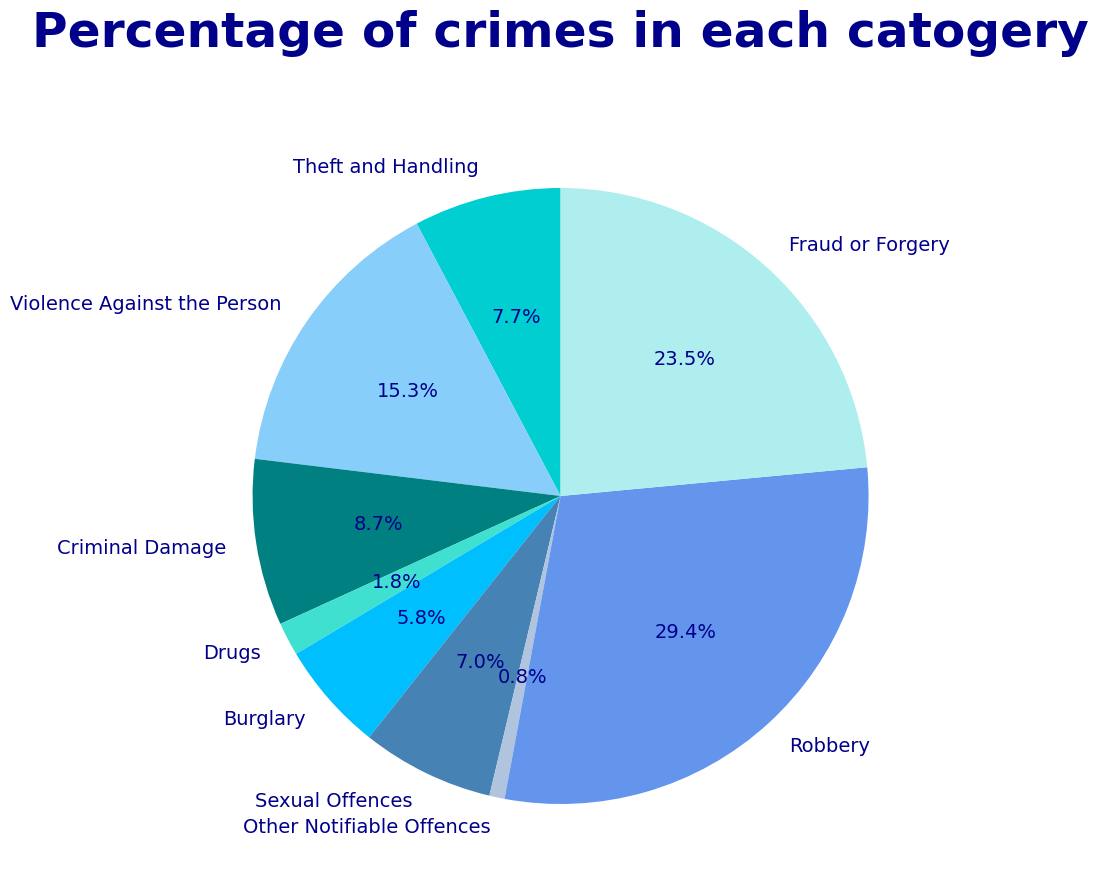

In [45]:
font1 = {'family': 'Franklin Gothic Medium ',
        'color':  'darkblue',
        'weight': 'bold',
        'size': 35,
        }

lables=df['major_category'].unique()

sizes=df.groupby(['major_category']).size()
colors=['darkturquoise','lightskyblue','teal','turquoise', 'deepskyblue','steelblue','lightsteelblue','cornflowerblue','paleturquoise']
plt.figure(figsize=(20,10))
ax = plt.axes()
ax.set_facecolor("lightblue")
plt.title('Percentage of crimes in each catogery\n',fontdict=font1)
ab=plt.pie(sizes, labels=lables, colors=colors, startangle=90,autopct='%1.1f%%', textprops={'fontsize': 14,'color':'darkblue'})
plt.show()

# Crimes in 2016

no of crime in each month in the year 2016
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
[58847 56697 59167 58637 63990 62262 65519 62666 61412 63405 61064 62455]


/var/folders/8h/67zlqswd6nsfxgp6gvbcx7gc0000gn/T/ipykernel_7604/2797366997.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_month=year2016.groupby(['month']).sum()
/var/folders/8h/67zlqswd6nsfxgp6gvbcx7gc0000gn/T/ipykernel_7604/2797366997.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(xrange,Values,s=250,color='darkgoldenrod',cmap='viridis',alpha=1)


(array([56000., 58000., 60000., 62000., 64000., 66000.]),
 [Text(0, 56000.0, '56000'),
  Text(0, 58000.0, '58000'),
  Text(0, 60000.0, '60000'),
  Text(0, 62000.0, '62000'),
  Text(0, 64000.0, '64000'),
  Text(0, 66000.0, '66000')])

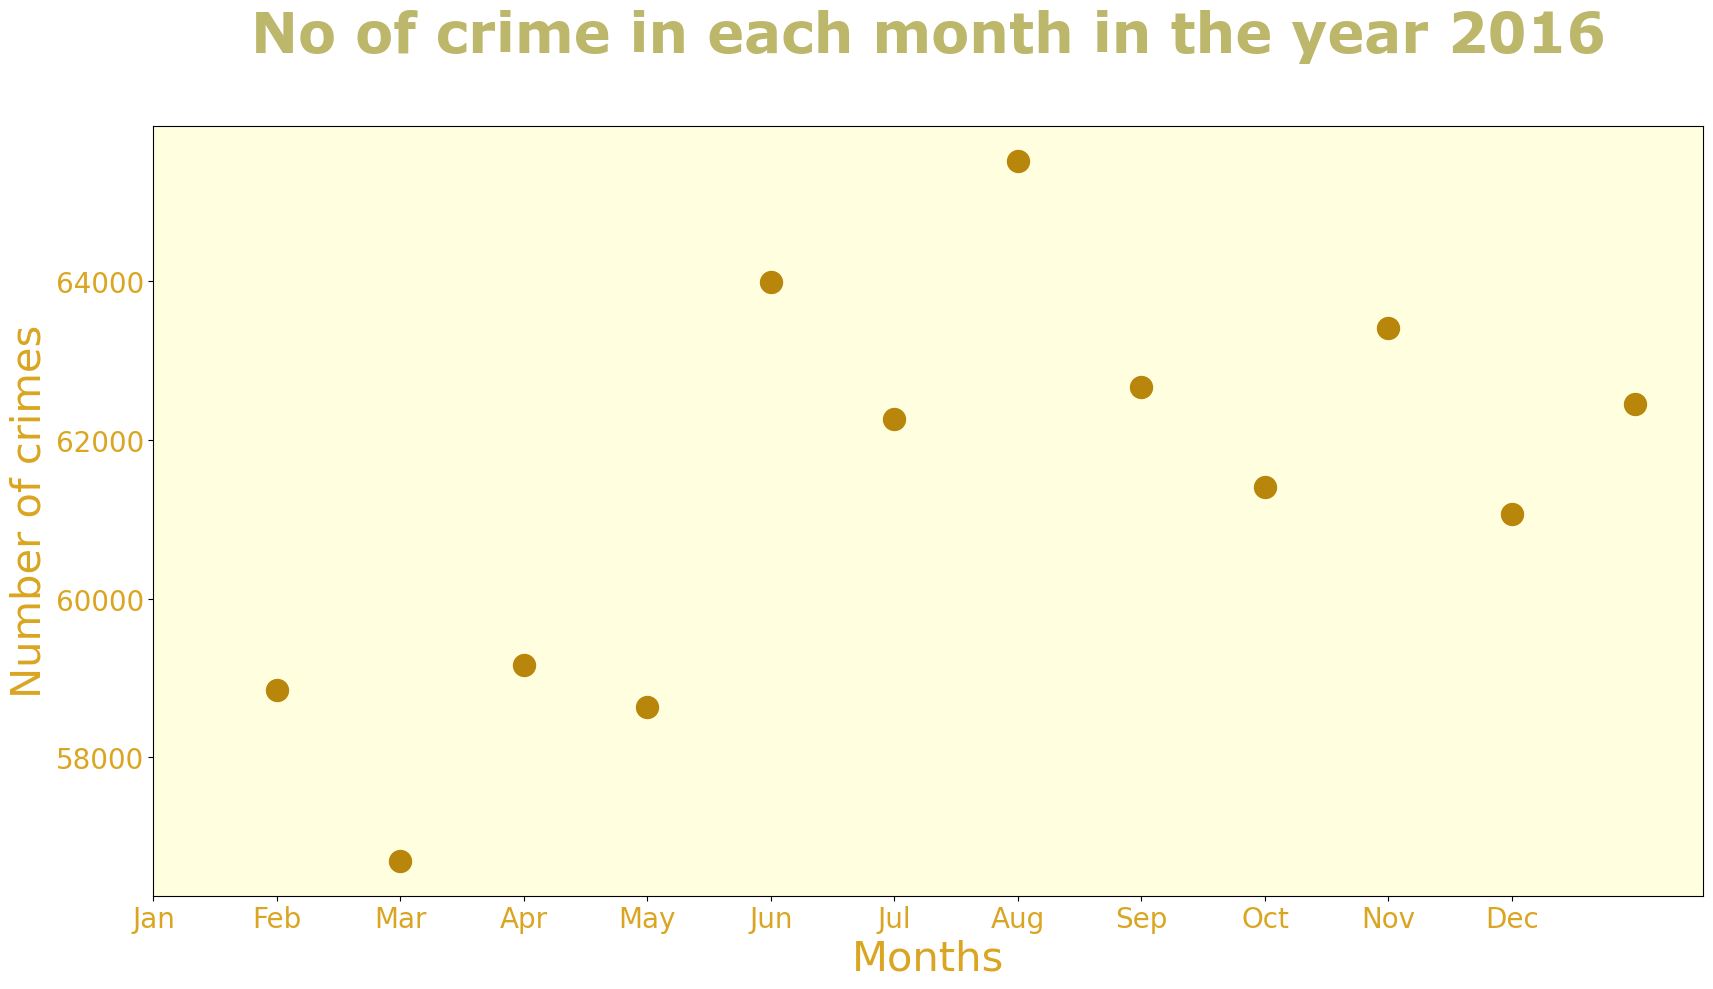

In [56]:
font = {'family': 'Verdana',
        'color':  'darkkhaki',
        'weight': 'bold',
        'size': 40,
        }
year2016=df.loc[df['year'] == 2016]

months=year2016['month'].unique()

months.sort()

sum_month=year2016.groupby(['month']).sum()

Values=sum_month['num_of_crimes'].to_numpy()
name_of_months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
print("no of crime in each month in the year 2016")
print(name_of_months)
print(Values)
n1 = np.arange(len(months))
xrange=range(1,13)
    
plt.figure(figsize=(20,10))
ax = plt.axes()
ax.set_facecolor("lightyellow")
plt.scatter(xrange,Values,s=250,color='darkgoldenrod',cmap='viridis',alpha=1)
plt.title("No of crime in each month in the year 2016\n",fontdict=font)
plt.xlabel('Months',fontsize=30,color='goldenrod')
plt.ylabel('Number of crimes',fontsize=30,color='goldenrod')
plt.xticks(n1,name_of_months)
plt.xticks(color='goldenrod',fontsize=20)
plt.yticks(color='goldenrod',fontsize=20)

# CONCLUSION

This analysis provides a comprehensive overview of crime in London from 2008 to 2016. It helps individuals and authorities understand crime distribution and trends, aiding in residence selection and crime control efforts. By focusing on the safest areas and understanding crime patterns, we can contribute to a safer London for everyone.

* Safest Boroughs Identified: The analysis identified the boroughs with the lowest total number of crimes, providing valuable insights for individuals seeking safe residential areas in London.

* High Crime Boroughs: Croydon, Bromley, Lambeth, Ealing, and Barnet were identified as the boroughs with the highest total number of crimes, highlighting areas where crime control efforts could be prioritized.

* Crime Rate vs. Total Crimes: By considering crime rates relative to population size, the analysis offered a more nuanced understanding of safety across boroughs, which is crucial for accurate residence selection.

* Theft and Handling Dominates: Theft and handling emerged as the most prevalent crime category, suggesting that initiatives to reduce theft could significantly impact overall crime rates.

* Violence Against the Person: Violence against the person was identified as the second most common crime, indicating a need for targeted interventions to address violent crimes.

* Yearly Crime Trends: The trend analysis revealed fluctuations in crime rates over the years, providing insights into the effectiveness of past crime control measures and helping to predict future trends.

* Seasonal Variations: The monthly crime data analysis showed seasonal variations, which can inform the timing of increased police presence and community safety programs.

* Data-Driven Decisions: The comprehensive data analysis enables data-driven decision-making for both individuals selecting residences and authorities focusing on crime reduction strategies.

* Visualizations for Clarity: The use of visualizations, such as bar plots, pie charts, and line plots, made complex data more accessible and understandable, aiding in the communication of key findings.

* Foundation for Future Research: This analysis lays the groundwork for further research, including potential clustering analysis and deeper investigations into the causes of high crime rates in specific boroughs.

These conclusions encapsulate the key findings and implications of the project, highlighting the importance of data analysis in improving safety and informing public policy in London.